# Computing in the Small
## Week 5 Cellular Automata
This week we want to look at cellular automata.  A cellular automata consists of a doubly infinite list of sites with values coming from a set $\{0, ..., k\}$.

![Rule 30](https://mathworld.wolfram.com/images/eps-svg/ElementaryCARule030_1000.svg)

<img src="https://mathworld.wolfram.com/images/eps-svg/ElementaryCARule030_1000.svg" height=256>


### Elementary Cellular Automata
An elementary cellular automaton consists of a lattice of sites taking on value 0 and 1, and a local rule in the form of a function: $f(x, y, z)$ which describes the new value at each site with the previous value at the site and its left and right neighbors.



#### Elementary Functions
Let's enumerate possible local functions.  The very simplest case is one where the value returned depends on no arguments.  There are two possibilities:
- $f() = 0$ which maps all values to $0$
- $f() = 1$ which maps all values to $1$

We can see this by noticing that we have two spaces to fill in: the answer returned when the input is $0$ and the answer when the input is $1$.  There are $2 \times 2$ possible ways to acocmplish this, hence four possible functions.

In Python (notice that the expression $1 - x$ takes $0$ to $1$ and $1$ to $0$):

In [ ]:
def f0():
    return 0

def f1():
    return 1

- $f(x) = x$ which maps $0$ to $0$ and $1$ to $1$
- $f(x) = 1 - x$ which maps  $0$ to $1$ and $1$ to $0$

In [ ]:
def f2(x):
    return x

def f3(x):
    return 1 - x

However, none of these functions gives rise to interesting beavior.  The next step is to consider functions that involve a value and its neighbor, which means functions $f(x,y)$ taking two inputs and returning $0$ and $1$.

Now we have to consider the values assigned to the inputs
$$(0,0), (0,1), (1,0), (1,1)$$
Since there are $2 \times 2 \times 2 \times 2$ values to fill in, there are $16$ possible functions.  This list includes the $4$ we have already talked about. 

Most computer languages support integer values with a fixed number of bits with typical lengths including $8$ ($8$ bits is called a byte), $16$, $32$ and sometimes $64$ or $128$.  These larger groupings are called a *WORD* and the definition of a *WORD* is specific to the computer you are running on.  In many cases, twice the storage assigned to a *WORD* is called a double word, *DWORD*

Python allows really large numbers (subject to available memory) and therefore there is no fixed bound on the number of bits.

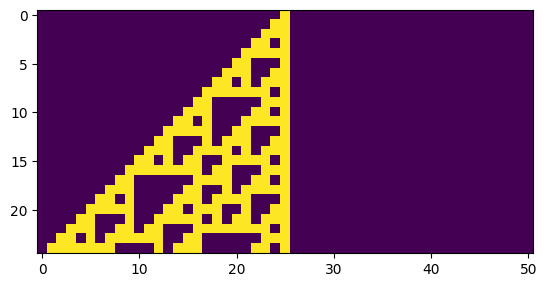

In [1]:
import matplotlib.pyplot as plt
from cellularautomata import ca_image

%matplotlib inline

plt.imshow(ca_image(110))